In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv("Heart_Disease_Prediction.csv")

In [3]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [4]:
present = df[df["Heart Disease"] == "Presence"]
absent = df[df["Heart Disease"] == "Absence"]

In [5]:
present

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,64,1,3,140,335,0,0,158,0,0.0,1,0,3,Presence
261,60,1,4,130,206,0,2,132,1,2.4,2,2,7,Presence
262,58,1,2,120,284,0,2,160,0,1.8,2,0,3,Presence
264,48,1,2,110,229,0,0,168,0,1.0,3,0,7,Presence


In [6]:
absent

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
10,59,1,4,135,234,0,0,161,0,0.5,2,0,7,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,49,1,2,130,266,0,0,171,0,0.6,1,0,3,Absence
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence


In [7]:
label_encoder = LabelEncoder()

In [8]:
df["Heart Disease"] = label_encoder.fit_transform(df["Heart Disease"])

In [9]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [10]:
number_of_heart_patients = len(present)/len(df)
number_of_non_heart_patients = len(absent)/len(df)

In [11]:
print("Percentage of heart patients: ", round(number_of_heart_patients*100, 2), "%")
print("Percentage of non heart patients: ", round(number_of_non_heart_patients*100, 2), "%")

Percentage of heart patients:  44.44 %
Percentage of non heart patients:  55.56 %


In [12]:
X = df.drop("Heart Disease", axis=1)
Y = df["Heart Disease"]

In [13]:
X

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [14]:
Y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: Heart Disease, Length: 270, dtype: int32

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, shuffle=True, random_state=101)

In [16]:
X_train

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
231,39,1,4,118,219,0,0,140,0,1.2,2,0,7
165,64,0,4,180,325,0,0,154,1,0.0,1,0,3
117,56,0,4,200,288,1,2,133,1,4.0,3,2,7
215,41,0,2,130,204,0,2,172,0,1.4,1,0,3
74,67,0,4,106,223,0,0,142,0,0.3,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,40,1,4,152,223,0,0,181,0,0.0,1,0,7
75,45,1,4,142,309,0,2,147,1,0.0,2,3,7
87,59,1,1,178,270,0,2,145,0,4.2,3,0,7
63,60,0,1,150,240,0,0,171,0,0.9,1,0,3


In [17]:
y_train

231    1
165    0
117    1
215    0
74     0
      ..
40     1
75     1
87     0
63     0
11     0
Name: Heart Disease, Length: 216, dtype: int32

In [18]:
smote = SMOTE(random_state=42)

In [19]:
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)

In [20]:
X_train_resample

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,39,1,4,118,219,0,0,140,0,1.200000,2,0,7
1,64,0,4,180,325,0,0,154,1,0.000000,1,0,3
2,56,0,4,200,288,1,2,133,1,4.000000,3,2,7
3,41,0,2,130,204,0,2,172,0,1.400000,1,0,3
4,67,0,4,106,223,0,0,142,0,0.300000,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,73,1,4,125,303,0,2,163,0,0.000000,1,2,3
236,64,0,3,175,228,0,0,164,0,0.973979,2,1,7
237,46,1,4,120,249,0,2,144,0,0.820446,1,0,6
238,66,1,4,159,285,0,2,108,1,1.475942,1,2,3


In [21]:
model = LogisticRegression()

In [22]:
model.fit(X_train_resample, y_train_resample)

C:\Users\Dhruv Gandhi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        30
           1       0.83      0.83      0.83        24

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54



In [26]:
cm = confusion_matrix(y_test, y_pred)

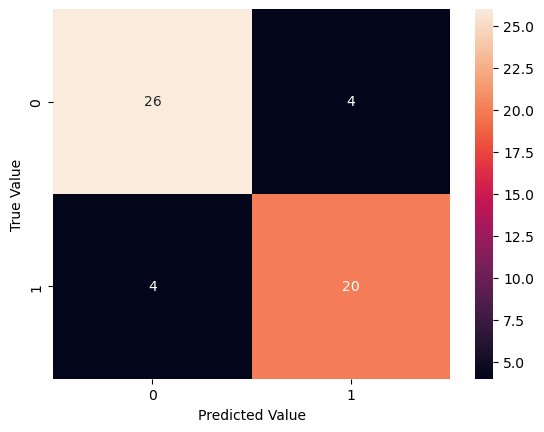

In [27]:
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.show()